The goal of this document is to numerically test the difference between the central and the raw moments up to the frequency correct. 

Note: We are comparing drawing from the n shifted distribution and from the thermal distribution but with a frequency correction applied

Plotting the dynamics vs. time with many samples. 

From Figure 4, we have the frequency correction code. 

/Users/thomassteckmann/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


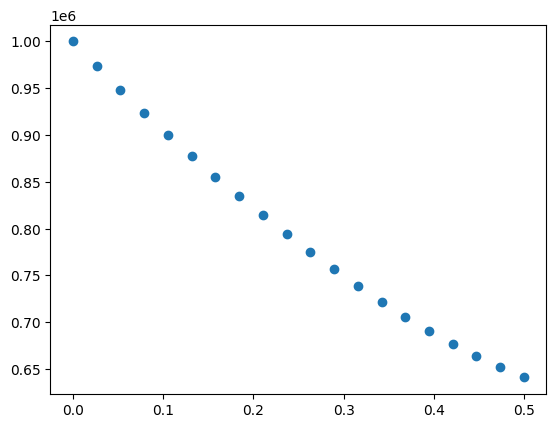

In [87]:

import sys
sys.path.append('../util')
sys.path.append('../')

from functions_util import calibrate_sim_Omegas, generate_experimental_data
from samplers_util import thermal_rejection, NORMALIZER
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


theta_list = np.linspace(0.00, 0.5, 20)
Omega_target = 1e6
times = np.linspace(0, 5, 100)*1e-6

scale_factors = calibrate_sim_Omegas(theta_list, Omega_target, times, debug=True)

In [88]:
full_corrected_exp = np.zeros((len(theta_list), len(times)))
for i, theta in tqdm(enumerate(theta_list)):
    updated_Omega = scale_factors[i]*Omega_target
    #print(generate_experimental_data(times, updated_Omega, [theta], 1000))
    full_corrected_exp[i] = generate_experimental_data(times, updated_Omega, [theta], 1000)[:,0]
no_correction  = np.zeros((len(theta_list), len(times)))
for i, theta in tqdm(enumerate(theta_list)):
    #print(generate_experimental_data(times, updated_Omega, [theta], 1000))
    no_correction[i] = generate_experimental_data(times, Omega_target, [theta], 1000)[:,0]
    
    #full_corrected_exp[i] = scale_factors[i]*Omega_target

#exp_data = generate_experimental_data(times, Omega_target, theta_list, 10000)

20it [00:02,  7.48it/s]
20it [00:02,  7.57it/s]


Text(0.5, 1.0, 'Corrected Experimental Data')

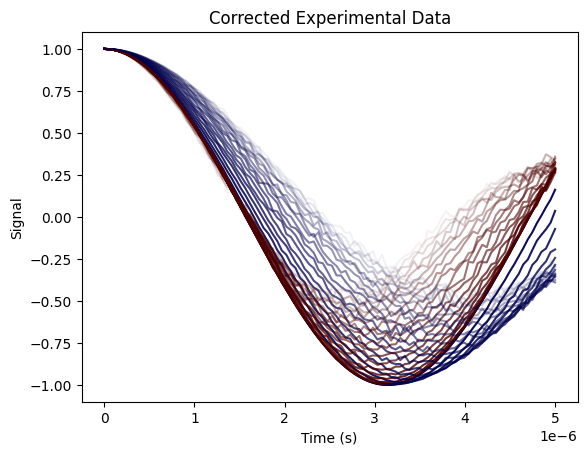

In [89]:
#Plot vs. time on a color gradient:
plt.figure()
for i, theta in enumerate(theta_list):
    plt.plot(times, full_corrected_exp[i], color=(0.3, 0, 0, 1-i/len(theta_list)))
    plt.plot(times, no_correction[i], color=(0, 0, 0.3, 1-i/len(theta_list)))
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.title('Corrected Experimental Data')


In [90]:
# #Omega samples:

# bins = 20
# theta = 0.05
# correction = calibrate_sim_Omegas([theta], Omega_target, times, debug=True)[0] #CHECK
# Omega_corrected = Omega_target*(1-thermal_rejection(theta, samples))*correction
# Omega_uncorrected =  Omega_target*(1-thermal_rejection(theta, samples))
# #Omega_mean_shift =  Omega_target*(1-thermal_rejection(theta, samples)+theta)

# #plot overlapping histograms of each:
# plt.figure()
# color = (0, 0, 0.3, 0.5)
# plt.vlines(np.mean(Omega_corrected), 0, samples/bins*10, color=color, label='Corrected')
# plt.hist(Omega_corrected, bins=bins, alpha=0.5, label='Corrected', color=color)

# #color = (0.3, 0, 0, 0.5)
# #plt.vlines(np.mean(Omega_uncorrected), 0, samples/bins*10, color=color, label='Uncorrected')
# #plt.hist(Omega_uncorrected, bins=1000, alpha=0.5, label='Uncorrected')

# color = (0, 0.3, 0, 0.5)
# #plt.vlines(np.mean(Omega_mean_shift), 0, samples/bins*10, color=color, label='Mean Shift')
# #plt.hist(Omega_mean_shift, bins=bins, alpha=0.5, label='Mean Shift', color=color)
# plt.legend()
# plt.show()


In [97]:
num_histograms = 5

# Number of bins for histograms
num_bins = 20
thetas = np.linspace(.2, 0, num_histograms)
samples = 1000000

data_sets = []
for theta in thetas:
    correction = calibrate_sim_Omegas([theta], Omega_target, times, debug=False)[0]
    corrected = Omega_target*(1-thermal_rejection(theta, samples))*correction/1e6
    raw = Omega_target*(1-thermal_rejection(theta, samples))/1e6
    data_sets.append([corrected, raw])
data_sets_array = np.array(data_sets)

/Users/thomassteckmann/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


/var/folders/vf/9t237r796tb0tg2rrtljdd940000gn/T/ipykernel_4298/425105427.py:161: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


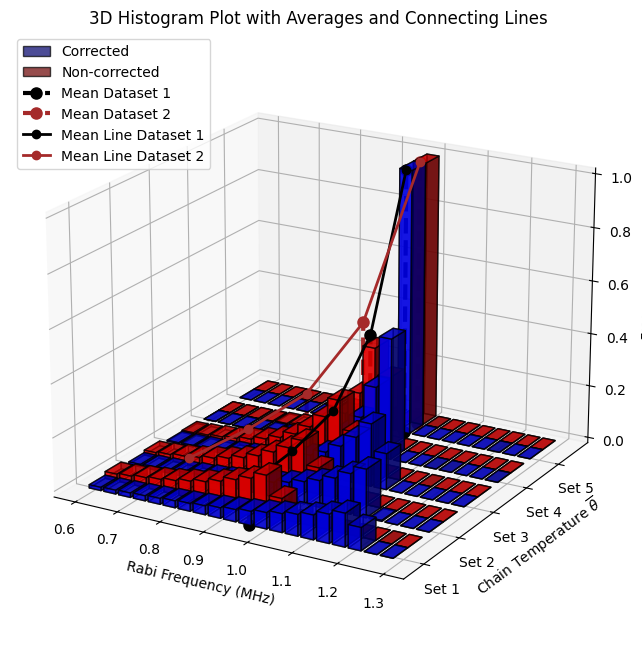

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Number of histograms (sets)
num_histograms = 5  # Define the number of histogram sets

# Generate synthetic data (uncomment and adjust as needed)

# Define common bins for consistency
num_bins = 20
bins = np.linspace(0.6, 1.3, num_bins + 1)

# Compute histogram data
hist_data = []
averages = []
for data1, data2 in data_sets:
    counts1, _ = np.histogram(data1, bins=bins)
    counts2, _ = np.histogram(data2, bins=bins)
    hist_data.append((counts1, counts2))
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    averages.append((mean1, mean2))

# Convert averages to numpy arrays for easier indexing
averages = np.array(averages)
mean1_array = averages[:, 0]
mean2_array = averages[:, 1]

# Create the 3D plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Width and depth of the bars
dx = (bins[1] - bins[0]) * 0.8  # X-axis (bin width)
dy = 0.4  # Y-axis (width of each histogram bar)
dz_scale = 1  # Scaling factor for counts

# Positions along the Y-axis for each histogram
y_positions = np.arange(num_histograms) * (2 * dy + 0.2)

# Colors for the two datasets
colors = ['blue', 'red']

# Initialize lists to collect mean positions and z-values
mean_positions1 = []
mean_positions2 = []
y_positions1 = []
y_positions2 = []
z_positions1 = []
z_positions2 = []

zorder_tracker = 0
for i, ((counts1, counts2), (mean1_value, mean2_value)) in enumerate(zip(hist_data, averages)):
    x_positions = bins[:-1]  # Left edges of bins
    y_pos = y_positions[i]
    # Positions for the first and second datasets
    y_pos1 = np.full_like(x_positions, y_pos - dy / 2)
    y_pos2 = np.full_like(x_positions, y_pos + dy / 2)
    max_count = max(counts1.max(), counts2.max())

    # Plot first histogram (corrected)
    ax.bar3d(
        x_positions, y_pos1, np.zeros_like(x_positions),
        dx, dy, counts1 * dz_scale,
        color=colors[0], alpha=0.7, edgecolor='black',
        label='Corrected' if i == 0 else "", zorder=zorder_tracker
    )
    zorder_tracker -= 2

    # Plot second histogram (non-corrected)
    ax.bar3d(
        x_positions, y_pos2, np.zeros_like(x_positions),
        dx, dy, counts2 * dz_scale,
        color=colors[1], alpha=0.7, edgecolor='black',
        label='Non-corrected' if i == 0 else "", zorder=zorder_tracker
    )
    zorder_tracker -= 2

    # Store mean positions and corresponding Y and Z positions
    mean_positions1.append(mean1_value)
    mean_positions2.append(mean2_value)
    y_positions1.append(y_pos - dy / 2)
    y_positions2.append(y_pos + dy / 2)
    z_positions1.append(max_count)
    z_positions2.append(max_count)

    # Enhance the visibility of average marks
    # Vertical line and marker for Dataset 1
    ax.plot(
        [mean1_value, mean1_value],
        [y_pos - dy / 2, y_pos - dy / 2],
        [0, max_count],
        color='black',
        linewidth=3,
        linestyle='--',
        marker='o',
        markersize=8,
        label='Mean Dataset 1' if i == 0 else "", zorder=zorder_tracker
    )
    zorder_tracker -= 2

    # Vertical line and marker for Dataset 2
    ax.plot(
        [mean2_value, mean2_value],
        [y_pos + dy / 2, y_pos + dy / 2],
        [0, max_count],
        color='brown',
        linewidth=3,
        linestyle='--',
        marker='o',
        markersize=8,
        label='Mean Dataset 2' if i == 0 else "", zorder=zorder_tracker
    )
    zorder_tracker -= 2

# Draw lines connecting the peaks of each average mark
# For Dataset 1
ax.plot(
    mean_positions1,
    y_positions1,
    z_positions1,
    color='black',
    linewidth=2,
    marker='o',
    markersize=6,
    label='Mean Line Dataset 1',
    zorder=10
)

# For Dataset 2
ax.plot(
    mean_positions2,
    y_positions2,
    z_positions2,
    color='brown',
    linewidth=2,
    marker='o',
    markersize=6,
    label='Mean Line Dataset 2',
    zorder=10
)

# Set labels
ax.set_xlabel('Rabi Frequency (MHz)')
ax.set_ylabel(r'Chain Temperature $\overline{\theta}$')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram Plot with Averages and Connecting Lines')

# Set Y-axis ticks and labels
ax.set_yticks(y_positions)
ax.set_yticklabels([f'Set {i+1}' for i in range(num_histograms)])

# Adjust view angle for better visualization
ax.view_init(elev=20, azim=-60)

# Add legend
ax.legend(loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In [93]:
# Set labels
ax.set_xlabel('Bins')
ax.set_ylabel('Histogram Sets')
ax.set_zlabel('Counts')
ax.set_title('3D Histogram Plot with Overlapping Histograms')

# Set Y-axis ticks to correspond to each histogram set
ax.set_yticks(y_positions)
ax.set_yticklabels([f'Set {i+1}' for i in range(num_histograms)])

# Create custom legend
from matplotlib.patches import Patch
legend_patches = [
    Patch(facecolor=colors[0], edgecolor='black', label='Dataset 1'),
    Patch(facecolor=colors[1], edgecolor='black', label='Dataset 2')
]
ax.legend(handles=legend_patches, loc='upper left')

# Adjust view angle for better visualization
ax.view_init(elev=20, azim=-60)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>